---
**Deepfake Detection using CNN**


---



In [1]:
! mkdir ~/.kaggle

In [2]:
! cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d manjilkarki/deepfake-and-real-images

 99% 1.67G/1.68G [00:12<00:00, 43.2MB/s]
100% 1.68G/1.68G [00:12<00:00, 141MB/s] 


In [4]:
! unzip deepfake-and-real-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Validation/Real/real_5499.jpg  
  inflating: Dataset/Validation/Real/real_55.jpg  
  inflating: Dataset/Validation/Real/real_550.jpg  
  inflating: Dataset/Validation/Real/real_5500.jpg  
  inflating: Dataset/Validation/Real/real_5501.jpg  
  inflating: Dataset/Validation/Real/real_5502.jpg  
  inflating: Dataset/Validation/Real/real_5503.jpg  
  inflating: Dataset/Validation/Real/real_5504.jpg  
  inflating: Dataset/Validation/Real/real_5505.jpg  
  inflating: Dataset/Validation/Real/real_5506.jpg  
  inflating: Dataset/Validation/Real/real_5507.jpg  
  inflating: Dataset/Validation/Real/real_5508.jpg  
  inflating: Dataset/Validation/Real/real_5509.jpg  
  inflating: Dataset/Validation/Real/real_551.jpg  
  inflating: Dataset/Validation/Real/real_5510.jpg  
  inflating: Dataset/Validation/Real/real_5511.jpg  
  inflating: Dataset/Validation/Real/real_5512.jpg  
  inflating: Dataset/Validation/Real/real_5513.jpg  

Displaying 6 images separately from Train Fake:


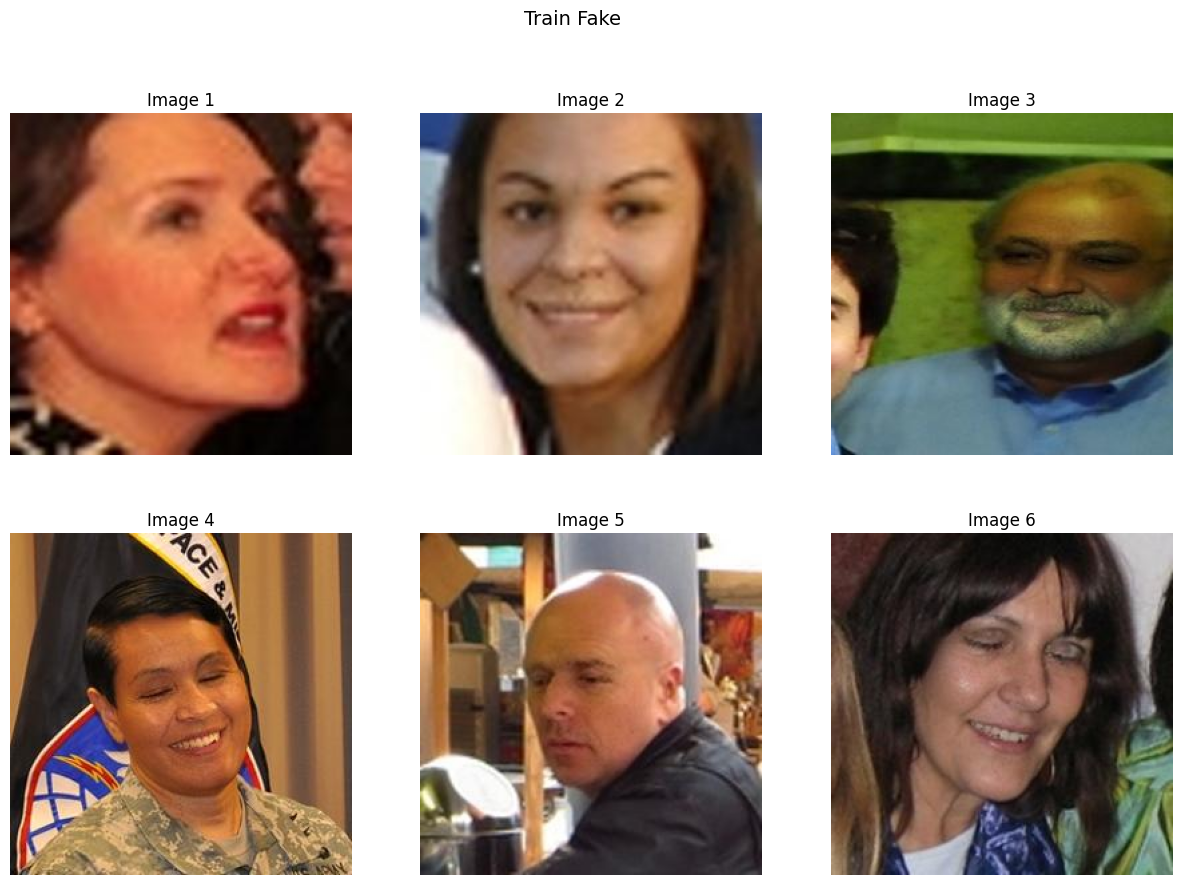

Displaying 6 images separately from Train Real:


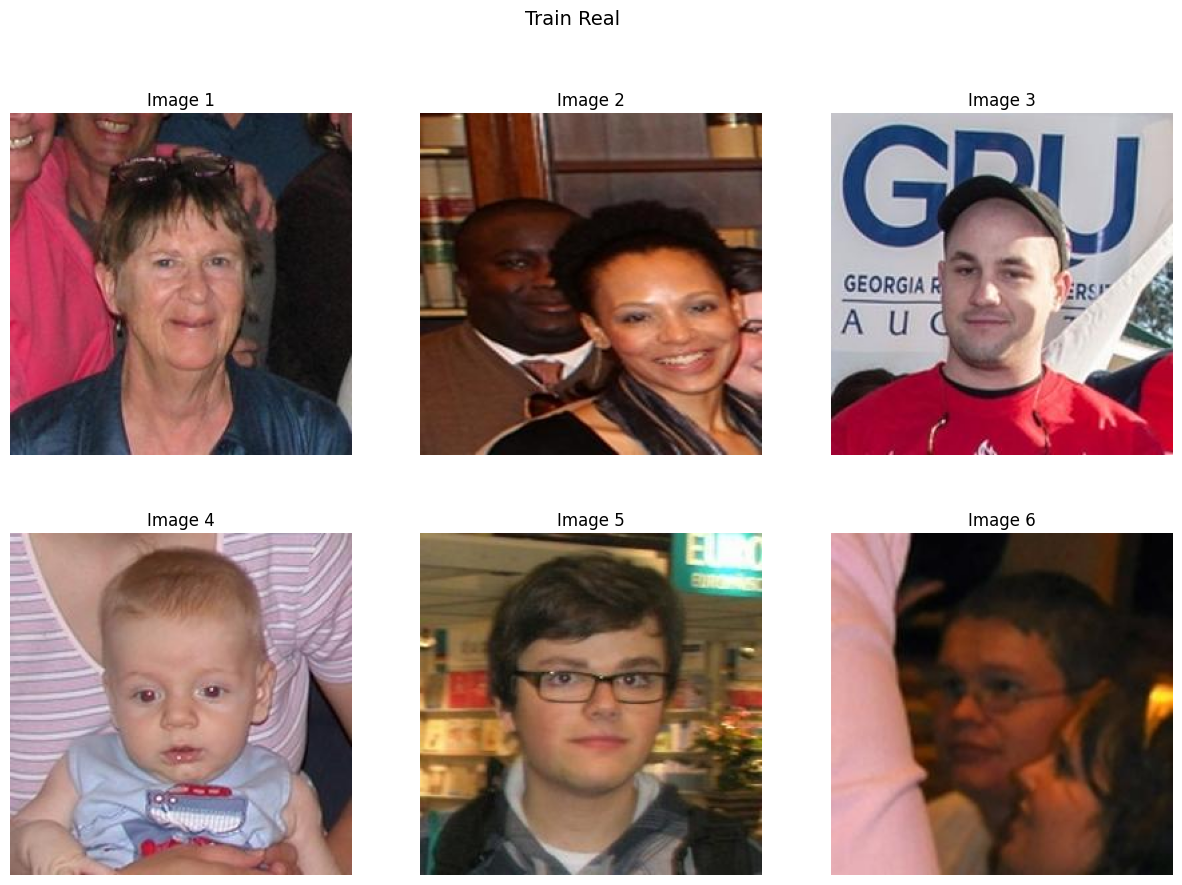

Displaying 6 images separately from Test Fake:


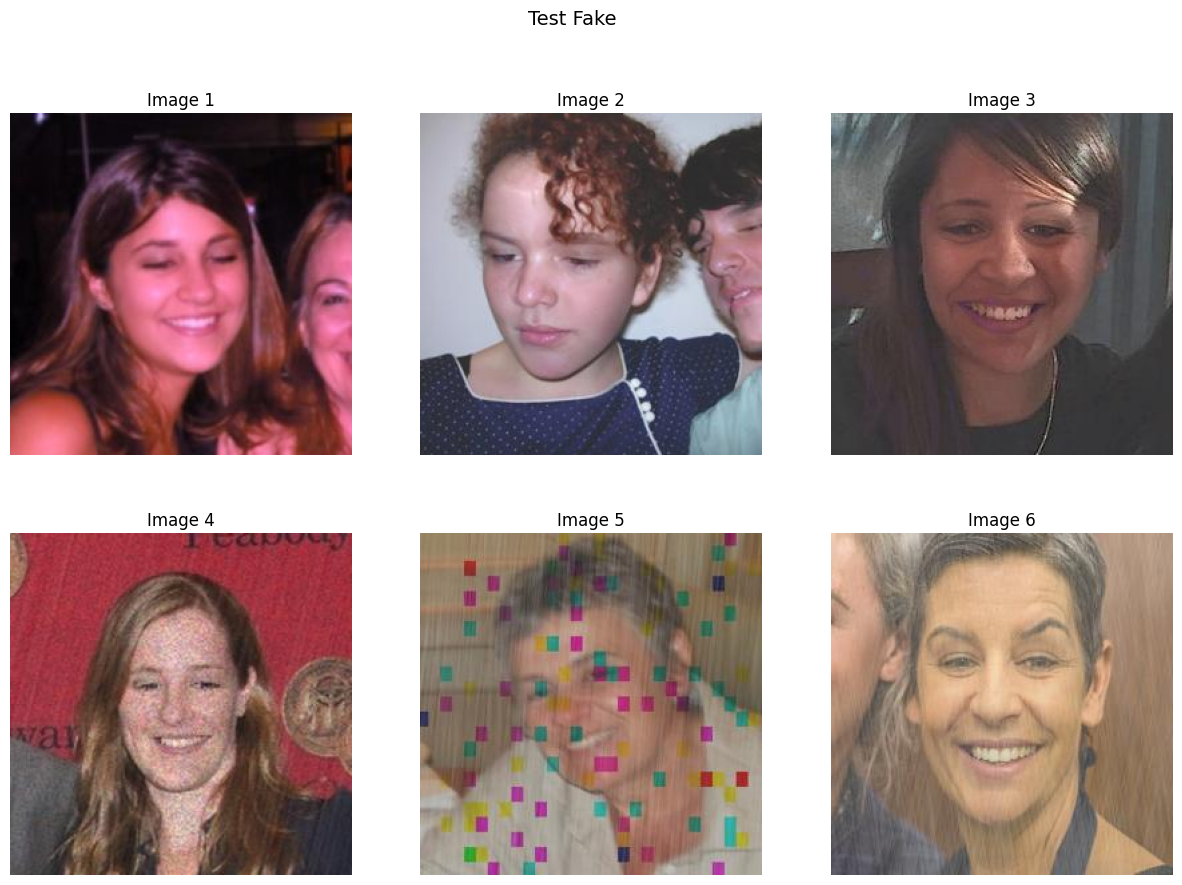

Displaying 6 images separately from Test Real:


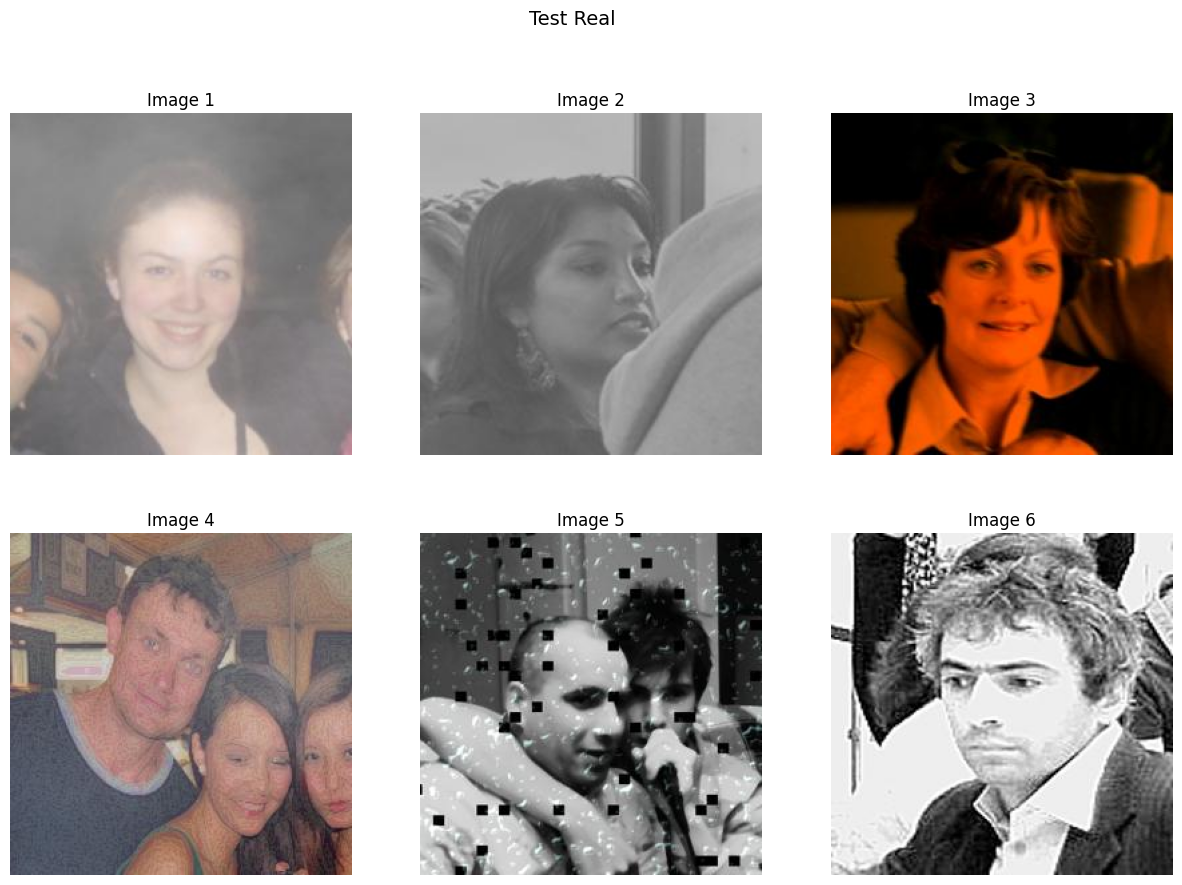

Displaying 6 images separately from Validation Fake:


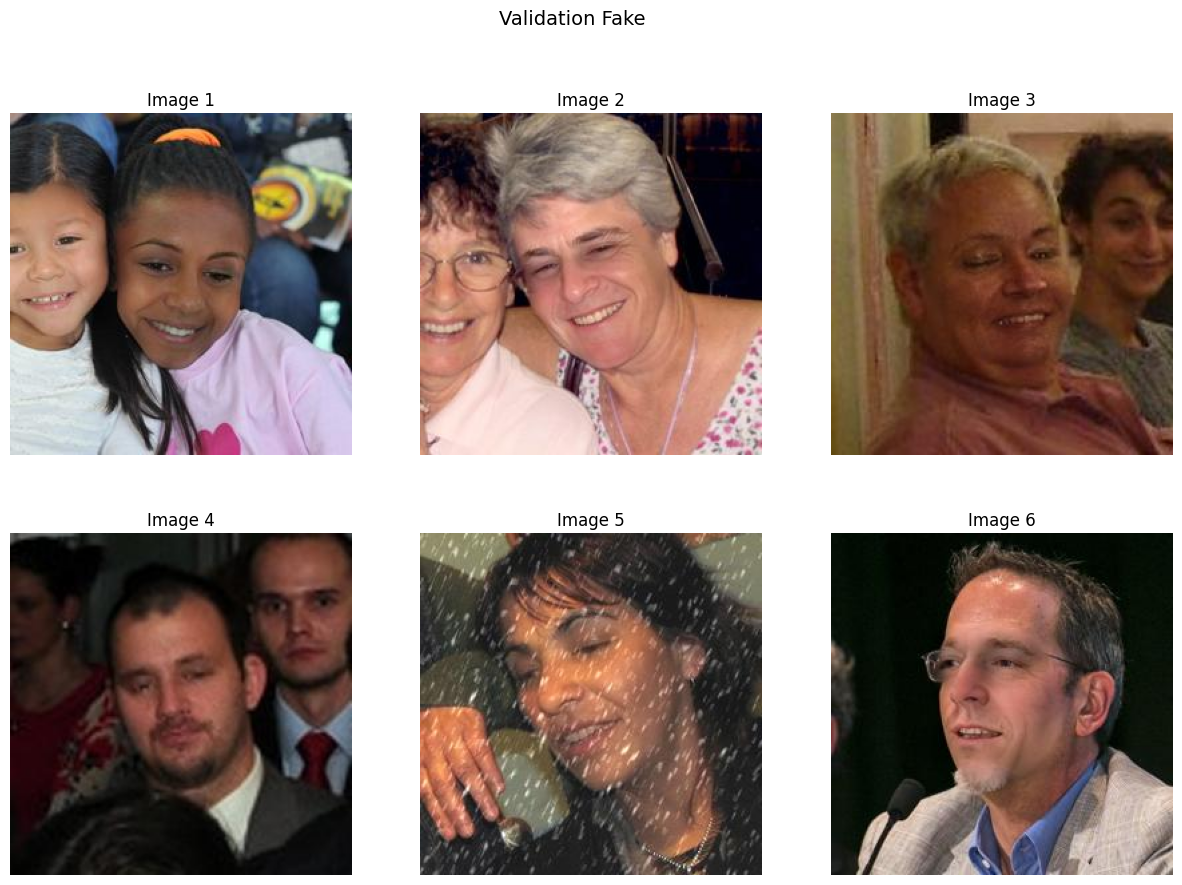

Displaying 6 images separately from Validation Real:


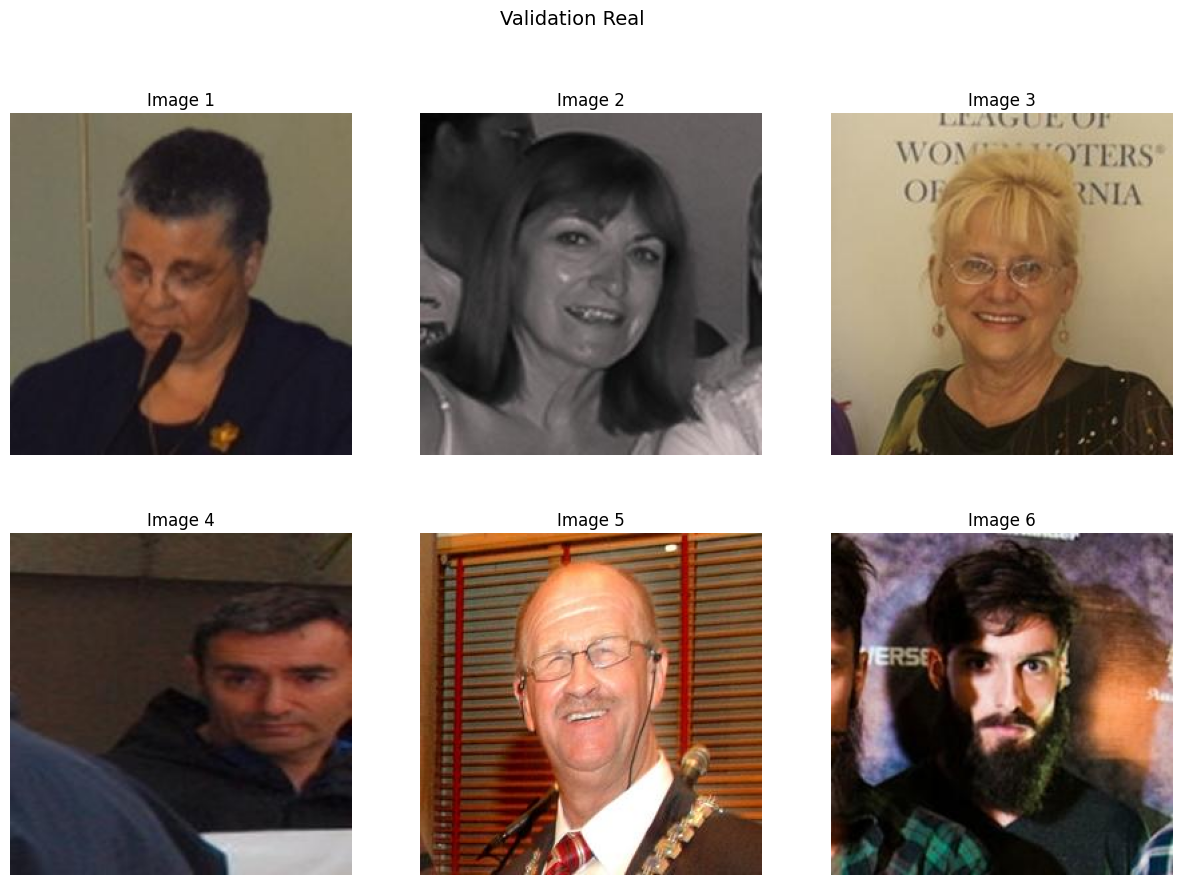

In [6]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to plot 6 images separately from a folder
def plot_images_separately_from_folder(folder_path, title):
    images = os.listdir(folder_path)[:6]  # List of first 6 images in the folder

    plt.figure(figsize=(15, 10))
    plt.suptitle(title, fontsize=14)
    for i, image_name in enumerate(images):
        img = mpimg.imread(os.path.join(folder_path, image_name))
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Image {i+1}")

    plt.show()

# Paths to different folders
paths = [
    ('Train Fake', '/content/Dataset/Train/Fake'),
    ('Train Real', '/content/Dataset/Train/Real'),
    ('Test Fake', '/content/Dataset/Test/Fake'),
    ('Test Real', '/content/Dataset/Test/Real'),
    ('Validation Fake', '/content/Dataset/Validation/Fake'),
    ('Validation Real', '/content/Dataset/Validation/Real')
]

# Plot 6 images separately from each folder
for title, path in paths:
    print(f"Displaying 6 images separately from {title}:")
    plot_images_separately_from_folder(path, title)


In [14]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Setting up the paths
train_path = '/content/Dataset/Train'
test_path = '/content/Dataset/Test'
validation_path = '/content/Dataset/Validation'

# Data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Setting up the generators
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(256, 256),
        batch_size=32,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(256, 256),
        batch_size=32,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_path,
        target_size=(256, 256),
        batch_size=32,
        class_mode='binary')

Found 140002 images belonging to 2 classes.
Found 10905 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.


In [15]:
# Build the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
4375/4375 [==============================] - 379s 86ms/step - loss: 0.2976 - accuracy: 0.8672 - val_loss: 0.2624 - val_accuracy: 0.8869
Epoch 2/10
4375/4375 [==============================] - 364s 83ms/step - loss: 0.1447 - accuracy: 0.9417 - val_loss: 0.2170 - val_accuracy: 0.9045
Epoch 3/10
4375/4375 [==============================] - 373s 85ms/step - loss: 0.0910 - accuracy: 0.9640 - val_loss: 0.2837 - val_accuracy: 0.8957
Epoch 4/10
4375/4375 [==============================] - 389s 89ms/step - loss: 0.0580 - accuracy: 0.9772 - val_loss: 0.2620 - val_accuracy: 0.9155
Epoch 5/10
4375/4375 [==============================] - 383s 88ms/step - loss: 0.0408 - accuracy: 0.9847 - val_loss: 0.3363 - val_accuracy: 0.9046
Epoch 6/10
4375/4375 [==============================] - 379s 87ms/step - loss: 0.0330 - accuracy: 0.9880 - val_loss: 0.3368 - val_accuracy: 0.9205
Epoch 7/10
4375/4375 [==============================] - 381s 87ms/step - loss: 0.0273 - accuracy: 0.9896 - val_loss: 0

In [ ]:
model.save('CNN_Deepfake.h5')